In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os,torch
from torch import nn


/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_rows', None)
df_json = pd.read_json('../../output/logs/logVitPretrained_XeniumSingleGene.json')
#df_json.loc[df_json.Gene == 'POSTN',:]
#df_json.loc[df_json.Gene == 'IL7R',:]
#df_json.loc[df_json.Gene == 'FASN',:]
df_json

,data,radius,if_froze_vit,learning_rate,weight_decay,batch_size,num_epochs,image_size,patch_size,mlp_head_units,mse_test,mse_valid,mse_valid_best,best_epoch,Gene,clip,test_patient,mse_test_best
0,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.000000,128,100,72,12,512-512,0.735616,0.747750,NaN,NaN,NaN,NaN,NaN,NaN
1,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.000000,128,100,72,12,512-512,0.846007,0.844772,NaN,NaN,NaN,NaN,NaN,NaN
2,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.000000,128,500,72,12,512-512,0.732601,0.744404,0.808016,140.0,NaN,NaN,NaN,NaN
3,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.001000,128,500,72,12,512-512,0.732648,0.744415,0.808013,61.0,NaN,NaN,NaN,NaN
4,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.000000,128,500,72,12,512-512,0.843753,0.842307,0.988361,497.0,NaN,NaN,NaN,NaN
5,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.001000,128,500,72,12,512-512,0.843834,0.842413,0.990658,100.0,NaN,NaN,NaN,NaN
6,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.000100,32,200,72,12,512-512,0.732527,0.744318,NaN,NaN,NaN,NaN,NaN,NaN
7,breast_cancer_sample1_rep2,two_cell,False,1.000000e-05,0.001000,32,200,72,12,512-512,0.406601,0.411754,NaN,NaN,NaN,NaN,NaN,NaN
8,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.001000,32,200,72,12,512-512,0.396349,0.396089,NaN,NaN,NaN,NaN,NaN,NaN
9,breast_cancer_sample1_rep1,two_cell,False,1.000000e-05,0.000100,32,200,72,12,512-512,0.843937,0.842538,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import sys
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py') ##~wont work, has to start with /Users



In [4]:
import numpy as np
from datasets import Dataset, Image

#TargetGene = 'FASN'
TargetGene = 'POSTN'
#gene_predict = 'IL7R'
#gene_predict = 'ITGAX'
#TargetGene = 'ACTA2'
#TargetGene = 'KRT15'
#TargetGene = 'VWF'
#TargetGene = 'CEACAM6'


tst_patient = 'Stage1'
data_set = 'breast_cancer_sample1_rep1'


#tst_patient = 'Stage2'
import VTransformerLib_torch as MyVit
MyVit.image_size = 384

In [5]:

# import DataXeniumBreastCancer_SingleGene as DataObj

# DataObj.X, DataObj.Y_filtered, voxel_ids_rep1 = DataObj.load_data(data_set, TargetGene)
# DataObj.X = np.array(DataObj.X).reshape((len(DataObj.X), 3, MyVit.image_size, MyVit.image_size))

# #2-fold cross validation
# np.random.seed(0)
# random_indx = np.random.choice(len(DataObj.X), len(DataObj.X)//2)

# train_data = np.array(DataObj.X)[random_indx,:]
# test_data = np.delete(np.array(DataObj.X), random_indx, axis = 0)
# train_voxels = np.array(DataObj.voxel_ids)[random_indx]

# train_labels = np.array(DataObj.Y_filtered)[random_indx]
# test_labels = np.delete(np.array(DataObj.Y_filtered),random_indx, axis = 0)
# test_voxels = np.delete(np.array(DataObj.voxel_ids),random_indx)


# if tst_patient == 'Stage2':

#     train_data = np.delete(np.array(DataObj.X), random_indx, axis = 0) 
#     test_data = np.array(DataObj.X)[random_indx,:]
#     test_voxels = np.array(DataObj.voxel_ids)[random_indx]


#     train_labels = np.delete(np.array(DataObj.Y_filtered),random_indx, axis = 0)
#     test_labels = np.array(DataObj.Y_filtered)[random_indx]
#     train_voxels = np.delete(np.array(DataObj.voxel_ids),random_indx)


# from datasets import Dataset


In [6]:
class SaveOutput:
    def __init__(self):
        self.outputs = []

    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out[1])

    def clear(self):
        self.outputs = []

def patch_attention(m):
    forward_orig = m.forward

    def wrap(*args, **kwargs):
        kwargs['need_weights'] = True
        kwargs['average_attn_weights'] = False

        return forward_orig(*args, **kwargs)

    m.forward = wrap

    
save_output = SaveOutput()
# for module in transformer.modules():
#     if isinstance(module, nn.MultiheadAttention):
#         utils.patch_attention(module)
#         module.register_forward_hook(save_output)

In [7]:
import torch
from PIL import Image
import numpy
import sys
from torchvision import transforms
import numpy as np
import cv2

def rollout(attentions, discard_ratio, head_fusion, ifNorm = True):
    result = torch.eye(attentions[0].size(-1))
    with torch.no_grad():
        for attention in attentions:
            if head_fusion == "mean":
                attention_heads_fused = attention.mean(axis=1)
            elif head_fusion == "max":
                attention_heads_fused = attention.max(axis=1)[0]
            elif head_fusion == "min":
                attention_heads_fused = attention.min(axis=1)[0]
            else:
                raise "Attention head fusion type Not supported"

            # Drop the lowest attentions, but
            # don't drop the class token
            flat = attention_heads_fused.view(attention_heads_fused.size(0), -1)
            _, indices = flat.topk(int(flat.size(-1)*discard_ratio), -1, False)
            indices = indices[indices != 0]
            flat[0, indices] = 0

            I = torch.eye(attention_heads_fused.size(-1))
            a = (attention_heads_fused + 1.0*I)/2
            a = a / a.sum(dim=-1)

            result = torch.matmul(a, result)
    
    # Look at the total attention between the class token,
    # and the image patches
    mask = result[0, 0 , 1 :]
    print(result.shape)
    # In case of 224x224 image, this brings us from 196 to 14
    width = int(mask.size(-1)**0.5)
    mask = mask.reshape(width, width).numpy()
    if ifNorm:
        mask = mask / np.max(mask)
    return mask    

class VITAttentionRollout:
    def __init__(self, model, attention_layer_name='attn_drop', head_fusion="mean",
        discard_ratio=0.9, ifNorm = True):
        self.model = model
        self.head_fusion = head_fusion
        self.discard_ratio = discard_ratio
        self.ifNorm = ifNorm

        for name, module in self.model.named_modules():
            ar = name.split('.')
            
            if attention_layer_name == ar[-1]:
                #patch_attention(module)
                #print(type(module))
                module.register_forward_hook(self.get_attention)

        self.attentions = []

    def get_attention(self, module, input, output):
        #print(np.array(module.scores.cpu()).shape)
        #print(np.array(output.cpu()).shape)
        self.attentions.append(module.scores.cpu())

    def __call__(self, input_tensor):
        self.attentions = []
        with torch.no_grad():
            output = self.model(input_tensor)

        return rollout(self.attentions, self.discard_ratio, self.head_fusion, self.ifNorm)




In [8]:
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
import cv2

image_size = MyVit.image_size

from transformers import ViTImageProcessor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch32-384")
image_mean, image_std = processor.image_mean, processor.image_std
print(image_mean, image_std)
normalize = transforms.Normalize(mean=image_mean, std=image_std)

image_aug_test = torch.nn.Sequential(
    #transforms.CenterCrop(MyVit.image_size-20),
    #transforms.RandomRotation(degrees=(0, 180)),
    #transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75)),
    #transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomVerticalFlip(p=0.5),
    normalize,
    transforms.Resize(MyVit.image_size)
)



def visualize_attention(model, img_path, discard_ratio = 0.5, head_fusion = 'max'):


    import cv2

    img = Image.open(img_path).convert('RGB')
    img = img.resize((image_size, image_size))
    img_trans = torch.Tensor(np.array(img).reshape(3, MyVit.image_size, MyVit.image_size))

    transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ])

    #input_tensor = image_aug_test(torch.Tensor(img_trans).cuda().unsqueeze(0))
    #print(input_tensor)
    input_tensor = transform(img).cuda().unsqueeze(0)
    
    model = model.cuda()
    attention_rollout = VITAttentionRollout(model, 
                                                  #attention_layer_name='attn.drop',
                                                  attention_layer_name='attn',
                                                  head_fusion=head_fusion,discard_ratio=discard_ratio,
                                                  ifNorm = True)        
    np_img = np.array(img)[:, :, ::-1]
    #_, mask = show_mask(np_img, mask)
    #print(mask)
    #print(mask.shape)
    #fig, axs = plt.subplots(1, 1)
    #axs[0].imshow(np.array(img));
    #axs[0].axis('off');
    #axs.imshow(mask);
    #axs.axis('off');
    
    #plt.savefig(f'stnet-attentions/{data_set}_test_attention/{barcode}.png', bbox_inches='tight')
    #plt.cla()
    #plt.close(fig)
    
    #return mask
    #plt.hist(mask.flatten())
    #print(mask[0,0])
    #print(mask[0,6])

    mask_orig = attention_rollout(input_tensor)
    mask = cv2.resize(mask_orig, (image_size,image_size))

    #img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    #heatmap = np.float32(heatmap) / 255
    #print(mask)
    return heatmap_rgb


def visualize_train_validation_att(img_path, vid, img_stage, discard_ratio = 0.9, head_fusion = 'max', saveFig = False):
    if img_stage == 'Stage1':
        heatmap_valid = visualize_attention(model2, img_path, discard_ratio, head_fusion)
        heatmap_train = visualize_attention(model1, img_path, discard_ratio, head_fusion)

    else:
        heatmap_valid = visualize_attention(model1, img_path, discard_ratio, head_fusion)
        heatmap_train = visualize_attention(model2, img_path, discard_ratio, head_fusion)

    
    im = Image.open(img_path).convert('RGB').resize((image_size,image_size))
    anno_path = data_dir_deepspace+data_set+"_cell_type/voxel_pics_128/"+vid+".png"
    im_anno = Image.open(anno_path).convert('RGB').resize((image_size,image_size))
    font_size = 15

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(15, 15))
    ax1.set_title(vid +' Original')
    ax2.set_title(vid +' Cell Type')
    ax3.set_title('Train Attention')
    ax4.set_title('Validation Attention')
    
    _ = ax1.imshow(im)
    _ = ax2.imshow(im_anno)
    _ = ax3.imshow(heatmap_train)
    _ = ax4.imshow(heatmap_valid)
    
    
        # Calculate the 2D density
    x = heatmap_train
    y = heatmap_valid
    xy = np.vstack([x.flatten(), y.flatten()])
    density = np.log(np.histogram2d(xy[0], xy[1], bins=50, density=True)[0]+1)
    pcm = ax5.imshow(density, cmap='plasma', origin='lower', aspect='1', extent=[x.min(), x.max(), y.min(), y.max()])
    plt.colorbar(pcm, label='Density', pad=0.04, fraction=0.046, ax = ax5)  # Add a colorbar and adjust its position
    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(x.flatten(), y.flatten())[0, 1]
    print(correlation_coefficient)
    # plt.text(0.02, 0.93, f'r = {correlation_coefficient:.2f}',
    #          transform=plt.gca().transAxes, fontsize=18, bbox=dict(facecolor='white', alpha=0.8))
    ax5.set_xlabel("Training Attention", fontsize = font_size)
    ax5.set_ylabel("Validation Attention",fontsize = font_size)
    ax5.set_title(f"TAVAC (r = {correlation_coefficient:.2f})")

    fig.tight_layout()
    #plt.subplots_adjust(hspace = 0, wspace = 0.5)

    
    #for category in range(df_Y.shape[1]):
        
        #visualize_grad_attention_label(model, img_path, category, discard_ratio = discard_ratio)
        

[0.5, 0.5, 0.5] [0.5, 0.5, 0.5]


In [9]:
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "1024"
torch.cuda.empty_cache()
#print(torch.cuda.memory_summary(device='cuda:0', abbreviated=False))
#os.environ['CUDA_VISIBLE_DEVICES']=''

if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu"

device = torch.device(dev)
import VTransformerLib_torch as MyVit


In [10]:
# MyVit.batch_size = 128 ################
# from torch.utils.data import TensorDataset, DataLoader


# # Create iterators for the Data loaded using DataLoader module
# def np_to_dataLoader(my_x, my_y):
#     tensor_x = torch.Tensor(my_x) # transform to torch tensor
#     tensor_y = torch.Tensor(my_y)

#     my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
#     my_dataloader = DataLoader(my_dataset, batch_size = MyVit.batch_size) # create your dataloader
#     return my_dataloader


# x_train = np.array(train_data)
# x_test = np.array(test_data)
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)


# train_data_loader = np_to_dataLoader(x_train, y_train)
# test_data_loader = np_to_dataLoader(x_test, y_test)

# train_data_size = x_train.shape[0]
# test_data_size = x_test.shape[0]

In [11]:

model_file1 = "../../saved_models/ViT_pretrained_XeniumBreastCancerDataSingleGene_"+TargetGene+"_"+data_set+"_Stage1.pt"
#model_file1 = "../../saved_models/ViT_pretrained_XeniumBreastCancerData_breast_cancer_sample1_rep1.pt"

#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'
print(model_file1)
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model1 = torch.load(model_file1, map_location=device)
model1.eval()
# this code imports the torch library 

model_file2 = "../../saved_models/ViT_pretrained_XeniumBreastCancerDataSingleGene_"+TargetGene+"_"+data_set+"_Stage2.pt"
#model_file2 = "../../saved_models/ViT_pretrained_XeniumBreastCancerData_breast_cancer_sample1_rep2.pt"

#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'
print(model_file2)
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model2 = torch.load(model_file2, map_location=device)
model2.eval()
# this code imports the torch library 



../../saved_models/ViT_pretrained_XeniumBreastCancerDataSingleGene_POSTN_breast_cancer_sample1_rep1_Stage1.pt
../../saved_models/ViT_pretrained_XeniumBreastCancerDataSingleGene_POSTN_breast_cancer_sample1_rep1_Stage2.pt


ViT(
  (patch_embedding): Conv2d(3, 1024, kernel_size=(32, 32), stride=(32, 32))
  (positional_embedding): PositionalEmbedding1D()
  (transformer): Transformer(
    (blocks): ModuleList(
      (0): Block(
        (attn): MultiHeadedSelfAttention(
          (proj_q): Linear(in_features=1024, out_features=1024, bias=True)
          (proj_k): Linear(in_features=1024, out_features=1024, bias=True)
          (proj_v): Linear(in_features=1024, out_features=1024, bias=True)
          (drop): Dropout(p=0.1, inplace=False)
        )
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (pwff): PositionWiseFeedForward(
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        )
        (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
      

In [12]:
data_set = 'breast_cancer_sample1_rep1' ##'BC23810' #patient with largest number of voxels

# from transformers import ViTImageProcessor
# processor = ViTImageProcessor.from_pretrained("google/vit-base-patch32-384")
# image_mean, image_std = processor.image_mean, processor.image_std
# print(image_mean, image_std)

# def predict_loader(valid_data_loader, modl):
#     pred_val = []
#     for j, (inputs, labels) in enumerate(valid_data_loader):
#         inputs = image_aug_test(inputs)
#         inputs = inputs.to(device)
#         labels = labels.to(device)
#         # Forward pass - compute outputs on input data using the model
#         outputs = modl(inputs)
#         # Compute loss

#         # Calculate validation accuracy
#         #ret, predictions = torch.max(outputs.data, 1)
#         #correct_counts = predictions.eq(labels.data.view_as(predictions))
#         # Convert correct_counts to float and then compute the mean
#         #acc = torch.mean(correct_counts.type(torch.FloatTensor))
#         # Compute total accuracy in the whole batch and add to valid_acc
#         #valid_acc += acc.item() * inputs.size(0)

#         pred_val += list(outputs.data.cpu().numpy())
        
#     pred_val = np.array(pred_val).flatten()
#     return pred_val


In [13]:
# outputs_1_tr = predict_loader(train_data_loader, model1)
# outputs_1_val = predict_loader(test_data_loader, model1)
# outputs_2_tr = predict_loader(train_data_loader, model2)
# outputs_2_val = predict_loader(test_data_loader, model2)

torch.Size([1, 145, 145])
torch.Size([1, 145, 145])
0.9803199010611114


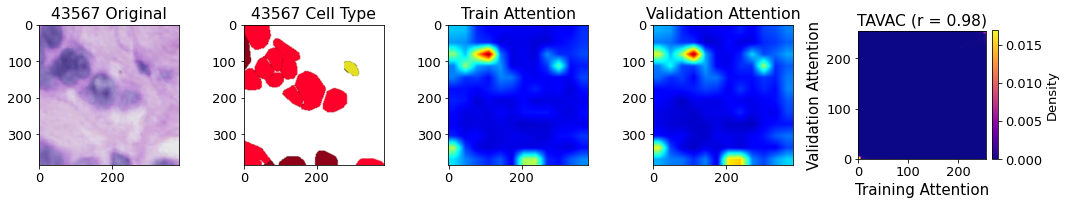

In [14]:
plt.rcParams.update({'font.size': 13})
data_dir_deepspace = '/projects/activities/deepspace/team/yue/data/Xenium-data/'

discard_ratio = 0.2

np.random.seed(0)
rep_num = 1
rand_indx = np.random.choice(160000, rep_num)
for vid in rand_indx:
    voxel_id = str(vid)
    img_path = data_dir_deepspace+data_set+"/voxel_pics_128/"+voxel_id+".png"

    visualize_train_validation_att(img_path, voxel_id, 'Stage1', discard_ratio=discard_ratio, 
                                   head_fusion = 'max')